# **Support Vector Machine (SVM) Classifier**

## **Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Importing the dataset**

In [2]:
data = pd.read_csv('encoded_data.csv', index_col=0)
data

,age,vis_wuhan,from_wuhan,result,gender_0,gender_1,gender_2,location_0,location_1,location_2,...,diff_sym_hos_6,diff_sym_hos_7,diff_sym_hos_8,diff_sym_hos_9,diff_sym_hos_10,diff_sym_hos_11,diff_sym_hos_12,diff_sym_hos_13,diff_sym_hos_14,diff_sym_hos_15
0,0.680851,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.574468,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.468085,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.617021,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.595745,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.234043,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,0.351064,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0.504255,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0.504255,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **Splitting the dataset into Training set and Test set**

In [3]:
X = data.iloc[:,:-1]
y = data['result']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .2, stratify=y)

## **Training the SVM Classification model on the Training set**

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C=1.0, probability=True, random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

## Predicting a new result

In [6]:
y_pred = classifier.predict(X_test)

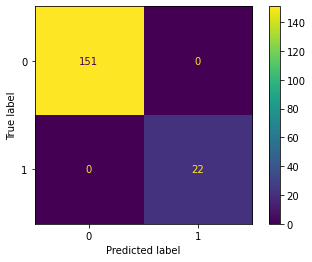

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classifier, X_test, y_test)

# **Classification Metrics**

In [8]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [9]:
# Classification Accuracy on the Test Set
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

Classification accuracy: 1.0000


In [10]:
# Classification Error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error: {0:0.4f}'.format(classification_error))

Classification error: 0.0000


In [11]:
# Precision Score
precision = TP / float(TP + FP)
print('Precision: {0:0.4f}'.format(precision))

Precision: 1.0000


In [12]:
# Recall or Sensitivity
recall = TP / float(TP + FN)
print('Recall or Sensitivity: {0:0.4f}'.format(recall))

Recall or Sensitivity: 1.0000


In [13]:
# F1 Score
f1 = 2 * (precision * recall) / (precision + recall)
print('F1 score: {0:0.4f}'.format(f1))

F1 score: 1.0000


# Classification Report

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00        22

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



## **ROC & AUC**

### **Prediction probabilities** 

In [15]:
r_probs = [0 for _ in range(len(y_test))]
svm_probs = classifier.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [16]:
svm_probs = svm_probs[:, 1]

In [17]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score

### **Calculate AUC**
**ROC** is the receiver operating characteristic - 
**AUC** is the area under the ROC curve

In [18]:
r_auc = roc_auc_score(y_test, r_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

### **Print AUC scores**

In [19]:
print('Random (chance) Prediction: AUC = %.3f' % (r_auc))
print('SVM: AUC = %.3f' % (svm_auc))

Random (chance) Prediction: AUC = 0.500
SVM: AUC = 1.000


### **Calculate ROC curve**

In [20]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

## **Plot the ROC curve**

In [21]:
import matplotlib.pyplot as plt

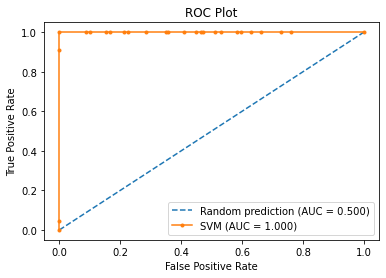

In [22]:

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUC = %0.3f)' % svm_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# Hyperparameters' Tuning

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[1, 3, 5, 7, 10]}
result = GridSearchCV(classifier, parameters, refit=True, cv=None, verbose=10)
result.fit(data, data.result)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START C=1, kernel=linear.........................................
[CV 1/5; 1/20] END ..........C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5; 1/20] START C=1, kernel=linear.........................................
[CV 2/5; 1/20] END ..........C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5; 1/20] START C=1, kernel=linear.........................................
[CV 3/5; 1/20] END ..........C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/5; 1/20] START C=1, kernel=linear.........................................
[CV 4/5; 1/20] END ..........C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5; 1/20] START C=1, kernel=linear.........................................
[CV 5/5; 1/20] END ..........C=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5; 2/20] START C=1, kernel=poly...........................................
[CV 1/5; 2/20] END ............C=1, kernel=poly

[CV 3/5; 11/20] END ............C=5, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5; 11/20] START C=5, kernel=rbf...........................................
[CV 4/5; 11/20] END ............C=5, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5; 11/20] START C=5, kernel=rbf...........................................
[CV 5/5; 11/20] END ............C=5, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5; 12/20] START C=5, kernel=sigmoid.......................................
[CV 1/5; 12/20] END ........C=5, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 2/5; 12/20] START C=5, kernel=sigmoid.......................................
[CV 2/5; 12/20] END ........C=5, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 3/5; 12/20] START C=5, kernel=sigmoid.......................................
[CV 3/5; 12/20] END ........C=5, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 4/5; 12/20] START C=5, kernel=sigmoid.......................................
[CV 4/5; 12/20] END ........